Generate temperature, salinity, nutrient, u and v initial files from run07.

## Generate initial and boundary conditions from run07

In [1]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
import os
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import struct
import xarray as xr

In [2]:
gridCan_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
gridNoC_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
state_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/stateGlob.nc'
ptracers_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/ptracersGlob.nc'

gridNoC = xr.open_dataset(gridNoC_file)
gridCan = xr.open_dataset(gridCan_file)
state = xr.open_dataset(state_file)
ptracers = xr.open_dataset(ptracers_file)

### Get slice for boundary conditions

I chose a cross section at xi = 120 gridpoints from west boundary.

Time index is tt=6 for day 3.

xslice = 120
timeslice = 6

In [4]:
u_bdy = state.U.isel(Xp1=120, T=6)
v_bdy = state.V.isel(X=120, T=6)

In [19]:
# Save binary file

dt = np.dtype('>f8')  # float 64 big endian

u_file = "u_OBCS_run07_day03.bin"
fileobj1 = open(u_file,mode='wb')
np.array(u_bdy).astype(dt).tofile(fileobj1,"")
fileobj1.close()

v_file = "v_OBCS_run07_day03.bin"
fileobj2 = open(v_file,mode='wb')
np.array(v_bdy).astype(dt).tofile(fileobj2,"")
fileobj2.close()


(1, 360, 90)
(1, 361, 90)


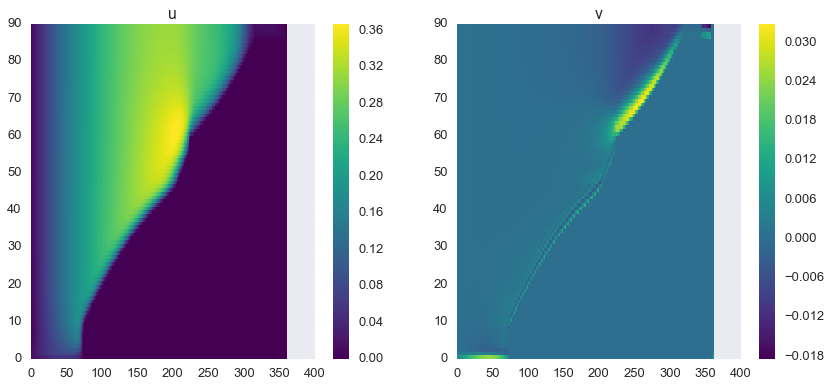

In [26]:
# Check what we wrote
fileNAME = "u_OBCS_run07_day03.bin" 
datau = np.fromfile(fileNAME, dt)

u_check = np.reshape(datau,(1,360,90),order='F')
print(np.shape(u_check))

fileNAME = "v_OBCS_run07_day03.bin" 
datav = np.fromfile(fileNAME, dt)

v_check = np.reshape(datav,(1,361,90),order='F')
print(np.shape(v_check))

sns.set_context('talk')
fig,ax = plt.subplots(1,2,figsize=(14,6))

pcol1 = ax[0].pcolor(np.flipud(np.transpose(u_check[0,:,:])), cmap = 'viridis')
plt.colorbar(pcol1,ax = ax[0])
ax[0].set_title('u')

pcol2 = ax[1].pcolor(np.flipud(np.transpose(v_check[0,:,:])), cmap = 'viridis')
plt.colorbar(pcol2,ax = ax[1])
ax[1].set_title('v')

In [ ]:
## Generate initial conditions